In [33]:
import numpy as np
import pandas as pd
import os
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [9]:
city        = 'london'
datafile    = 'FINAL_DATA'
successdata = datafile + '/london_venues_success_measures.csv'
venues      = [line.strip() for line in open(datafile + '/senior_venues_lists.dat')]


success  = pd.read_csv(successdata, sep = '\t', index_col = 0)
success  = success[~success.index.duplicated(keep='first')]   
success  = success[success.index.isin(venues)]



successdata_L = datafile + '/london_venues_success_measures_local_like.csv'
success_L     = pd.read_csv(successdata_L, sep = '\t', index_col = 0)
success_L     = success_L[~success_L.index.duplicated(keep='first')]   
success       = success.join(success_L)

success.index.name = 'venue'

success.head()   

,tipCount,checkinsCount,usersCount,Llikecount
venue,,,,
4a5f9446f964a520e0bf1fe3,75.0,2500.0,1831.0,33.195062
4abcec53f964a520b98720e3,17.0,1550.0,913.0,16.468388
4abdc1c7f964a5206d8b20e3,47.0,5573.0,2777.0,91.575568
4abe4502f964a520558c20e3,575.0,97190.0,80793.0,445.616354
4abe5714f964a520d68c20e3,54.0,1507.0,1256.0,49.789535


In [8]:
features = pd.read_csv('senior_venues_features_labels.csv', sep = '\t', index_col = 0)
features.head()

,WHERE_sub_region,WHERE_distance_from_center,WHERE_building,WHERE_food,WHERE_na,WHERE_travel,WHERE_Venues_num,WHERE_user_centroids,WHERE_parks_outdoors,WHERE_Entropy,...,WHO_v_wa_geo_stdev_of_ego_inv_distances,WHO_v_wa_betweenness_wa,WHO_v_wa_clustering_grav_distances,WHO_v_wa_geo_social_stretch_distances,WHO_v_wa_egosize,WHO_v_wa_geo_stdev_of_ego_distances,WHO_v_wa_constraint_wa,WHO_v_wa_pagerank_exp_distances,WHO_v_wa_eigenvector,LABEL_category
venue,,,,,,,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0,4.064099,0.175676,0.280405,0.010135,0.187500,592,192,0.043919,0.811208,...,0.0,0.0,0.0,2.019477,2.0,0.0,1.0,0.000019,0.0,1
4abcec53f964a520b98720e3,0,0.232250,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1
4abdc1c7f964a5206d8b20e3,0,2.306181,0.317386,0.252042,0.016336,0.039090,1714,651,0.030922,0.781289,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1
4abe4502f964a520558c20e3,0,1.137742,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,5
4abe5714f964a520d68c20e3,0,0.707539,0.199941,0.273588,0.016169,0.053239,10143,5276,0.012620,0.770677,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1


In [15]:
all_data = features.join(success)
print len(all_data.keys()), len(success.keys()), len(features.keys())

520 4 516


In [36]:
[m for m in  features.keys() if 'dist' in m.lower()]

['WHERE_distance_from_center',
 'WHERE_DistCentre',
 'WHERE_z_distCent1',
 'WHO_us_w_geo_social_stretch_distances_entropy',
 'WHO_u_eigenvector_exp_distances_entropy',
 'WHO_us_wa_geo_stdev_of_ego_inv_distances_entropy',
 'WHO_u_geo_social_stretch_grav_distances_avg',
 'WHO_u_eigenvector_inv_distances_avg',
 'WHO_us_w_constraint_grav_distances_avg',
 'WHO_us_w_betweenness_grav_distances_std',
 'WHO_u_pagerank_inv_distances_entropy',
 'WHO_u_geo_social_stretch_exp_distances_std',
 'WHO_us_w_closeness_inv_distances_std',
 'WHO_u_eigenvector_exp_distances_avg',
 'WHO_us_w_betweenness_inv_distances_avg',
 'WHO_us_w_betweenness_grav_distances_entropy',
 'WHO_u_constraint_exp_distances_std',
 'WHO_us_w_betweenness_grav_distances_avg',
 'WHO_u_betweenness_exp_distances_entropy',
 'WHO_us_wa_constraint_inv_distances_entropy',
 'WHO_u_constraint_exp_distances_avg',
 'WHO_u_geo_social_stretch_grav_distances_std',
 'WHO_us_w_geo_stdev_of_ego_grav_distances_avg',
 'WHO_u_pagerank_inv_distances_avg

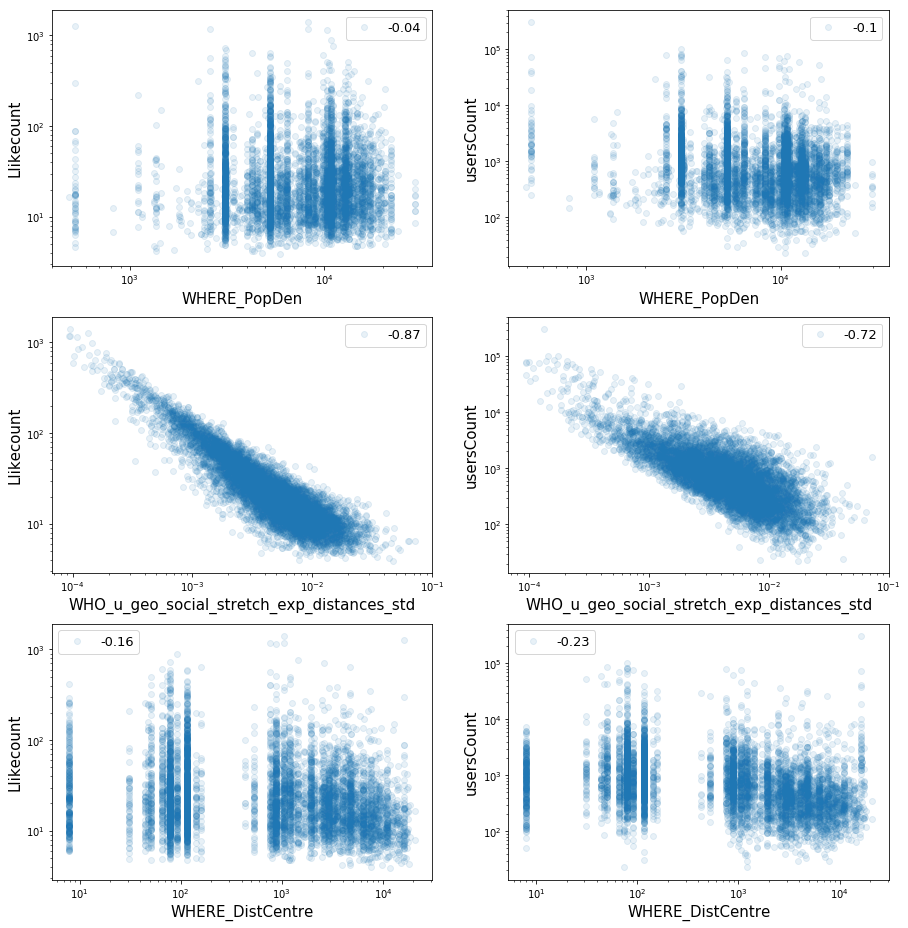

In [43]:
# tipCount 	checkinsCount 	usersCount 	Llikecount

def plot_stuff(bx, all_data, meas1, meas2):

    x = all_data[meas1] 
    y = all_data[meas2]
    
    bx.plot(x, y, 'o', alpha = 0.1, label = str(round(spearmanr(x, y)[0], 2)))
    bx.set_ylabel(meas2, fontsize = 15)
    bx.set_xlabel(meas1, fontsize = 15)
    bx.set_yscale('log')
    bx.set_xscale('log')
    bx.legend(loc = 'best', fontsize = 13)

    

f, ax  = plt.subplots(3,2, figsize = (15, 16))

plot_stuff(ax[0,0], all_data, 'WHERE_PopDen', 'Llikecount')
plot_stuff(ax[0,1], all_data, 'WHERE_PopDen', 'usersCount')


plot_stuff(ax[1,0], all_data, 'WHO_u_geo_social_stretch_exp_distances_std', 'Llikecount')
plot_stuff(ax[1,1], all_data, 'WHO_u_geo_social_stretch_exp_distances_std', 'usersCount')


plot_stuff(ax[2,0], all_data, 'WHERE_DistCentre', 'Llikecount')
plot_stuff(ax[2,1], all_data, 'WHERE_DistCentre', 'usersCount')






Text(0.5,1,'LondonLikeCount vs features correlation histogram')

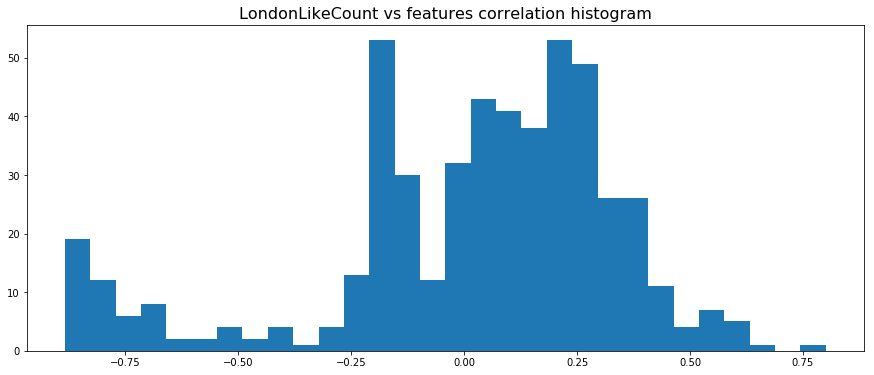

In [63]:
def get_correlations(all_data, meas1, y):

    x = all_data[meas1] 
    
    return spearmanr(x, y)[0]

    


Llikecount = all_data.Llikecount
usersCount = all_data.usersCount
measures   = features.keys()

correlations = []

for m in measures:
    
    correlations.append(get_correlations(all_data, m, Llikecount))
    
correlations = np.asarray(correlations)    
correlations = correlations[~np.isnan(correlations)] 

f, ax = plt.subplots(1,1, figsize = (15,6))

ax.hist(correlations, bins = 30)
ax.set_title('LondonLikeCount vs features correlation histogram', fontsize = 16)

In [68]:
def get_correlations(all_data, meas1, y):

    x = all_data[meas1] 
    
    if abs(spearmanr(x, y)[0]) > 0.5 and 'exp' not in meas1:
        print meas1, '\t', round(spearmanr(x, y)[0], 3)
   


Llikecount = all_data.Llikecount
usersCount = all_data.usersCount
measures   = features.keys()

for m in measures:
    get_correlations(all_data, m, Llikecount)
    

WHO_m_entropy 	0.801
WHO_usersCount_avg_entropy 	0.522
WHO_lLondonLike_std_entropy 	0.507
WHO_tipCount_avg_entropy 	0.605
WHO_lLondonLike_avg_entropy 	0.638
WHO_tipCount_std_entropy 	0.56
WHO_u_eigenvector_inv_distances_avg 	-0.728
WHO_u_closeness_avg 	-0.883
WHO_u_pagerank_inv_distances_avg 	-0.825
WHO_u_geo_stdev_of_ego_inv_distances_avg 	-0.734
WHO_u_constraint_inv_distances_entropy 	0.548
WHO_u_clustering_grav_distances_std 	-0.776
WHO_u_egosize_entropy 	-0.532
WHO_u_clustering_inv_distances_entropy 	0.588
WHO_u_egosize_avg 	-0.732
WHO_u_geo_social_stretch_inv_distances_std 	-0.696
WHO_u_pagerank_grav_distances_std 	-0.663
WHO_u_pagerank_grav_distances_avg 	-0.805
WHO_u_geo_social_stretch_distances_avg 	-0.868
WHO_u_constraint_grav_distances_avg 	-0.872
WHO_u_constraint_grav_distances_std 	-0.875
WHO_u_geo_stdev_of_ego_distances_avg 	-0.848
WHO_u_clustering_std 	-0.702
WHO_u_clustering_grav_distances_entropy 	0.605
WHO_u_pagerank_inv_distances_std 	-0.711
WHO_u_eigenvector_grav_dis